# Animal Bites
### This dataset includes information on over 9,000 animal bites which occurred near Louisville, Kentucky from 1985 to 2017 and includes information on whether the animal was quarantined after the bite occurred and whether that animal was rabid.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 


In [3]:
df=pd.read_csv('Health_AnimalBites.csv')
df.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


### Features of Animal Bite Data

    bite_date: The date the bite occurred
    SpeciesIDDesc: The species of animal that did the biting
    BreedIDDesc: Breed (if known)
    GenderIDDesc: Gender (of the animal)
    color: color of the animal
    vaccination_yrs: how many years had passed since the last vaccination
    vaccination_date: the date of the last vaccination
    victim_zip: the zipcode of the victim
    AdvIssuedYNDesc: whether advice was issued
    WhereBittenIDDesc: Where on the body the victim was bitten
    quarantine_date: whether the animal was quarantined
    DispositionIDDesc: whether the animal was released from quarantine
    head_sent_date: the date the animal’s head was sent to the lab
    release_date: the date the animal was released
    ResultsIDDesc: results from lab tests (for rabies) 


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bite_date          8686 non-null   object 
 1   SpeciesIDDesc      8885 non-null   object 
 2   BreedIDDesc        3759 non-null   object 
 3   GenderIDDesc       6477 non-null   object 
 4   color              6426 non-null   object 
 5   vaccination_yrs    3738 non-null   float64
 6   vaccination_date   4115 non-null   object 
 7   victim_zip         7165 non-null   object 
 8   AdvIssuedYNDesc    2565 non-null   object 
 9   WhereBittenIDDesc  8387 non-null   object 
 10  quarantine_date    2020 non-null   object 
 11  DispositionIDDesc  1535 non-null   object 
 12  head_sent_date     395 non-null    object 
 13  release_date       1445 non-null   object 
 14  ResultsIDDesc      1543 non-null   object 
dtypes: float64(1), object(14)
memory usage: 1.0+ MB


In [7]:
df.isnull().sum()

bite_date             317
SpeciesIDDesc         118
BreedIDDesc          5244
GenderIDDesc         2526
color                2577
vaccination_yrs      5265
vaccination_date     4888
victim_zip           1838
AdvIssuedYNDesc      6438
WhereBittenIDDesc     616
quarantine_date      6983
DispositionIDDesc    7468
head_sent_date       8608
release_date         7558
ResultsIDDesc        7460
dtype: int64

#### -It seems there is a lot of missing data in this dataframe, which will have to be dealt with before drawing valuable conclusions about his dataset. By just a cursory look at the data, I am sure dogs are the most often culprit of biting humans, but I would be interested to see if there is a strong probability of being bit by a dog with rabies compared to other species. This will be difficult to ascertain, as the vast majority of the data for lab results regarding rabies tests is NaN. First, let's look at the number of bites by species. 

In [10]:
species = df.SpeciesIDDesc
species = species.dropna() 
speciesOfAnimal = species.unique()
print(speciesOfAnimal)

['DOG' 'CAT' 'BAT' 'RACCOON' 'OTHER' 'RABBIT' 'HORSE' 'SKUNK' 'FERRET']


[7029, 1568, 237, 27, 11, 3, 5, 1, 4]


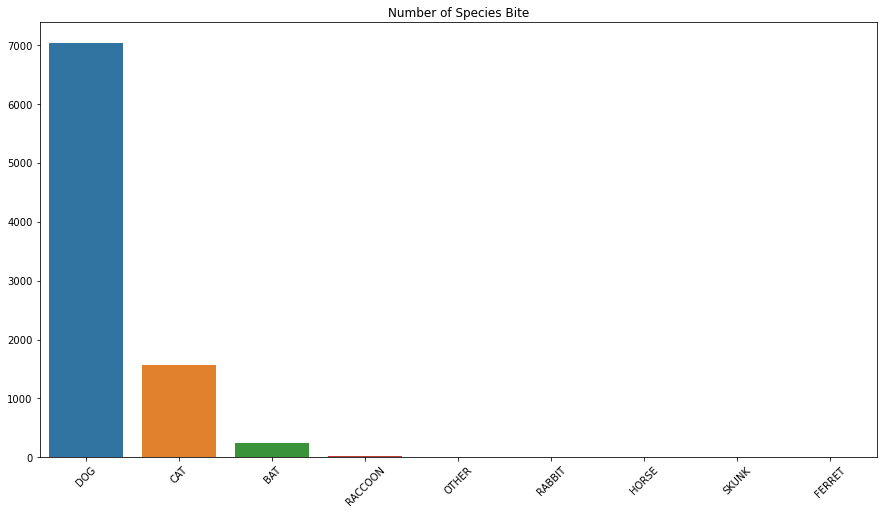

In [42]:
species_list = []
for i in speciesOfAnimal: 
    species_list.append(len(species[species==i]))
plt.figure(figsize=(15,8))
ax = sns.barplot(x=speciesOfAnimal, y =species_list)
plt.title('Number of Species Bite')
plt.xticks(rotation=45)
print(species_list)   

#### - Clearly, as expected, dogs were the majority perpitrator for this data set regarding number of bites. It would be interesting to see which breeds of dogs were most likely to bite. 

Text(0.5, 1.0, 'Number of bites per Dog Breed')

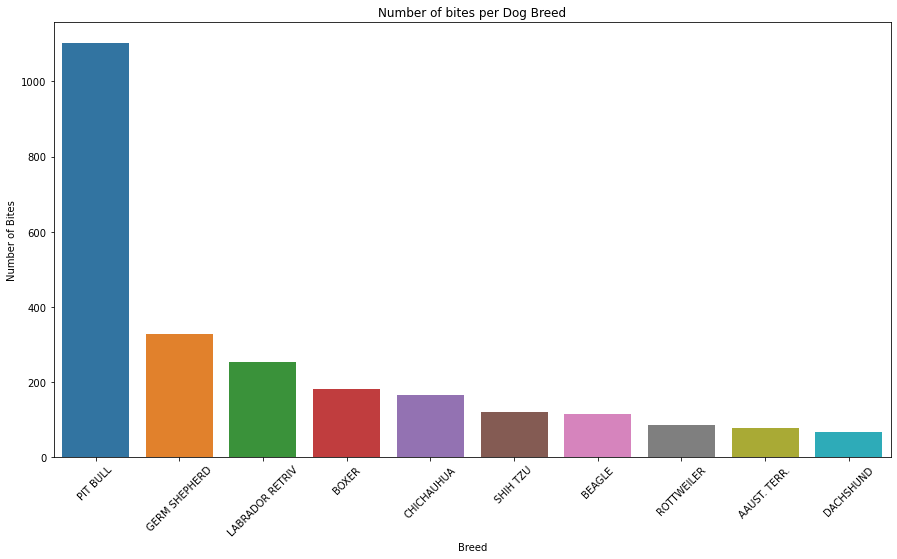

In [40]:
breeds = df.BreedIDDesc.value_counts()
plt.figure(figsize=(15,8))
ax = sns.barplot(x=breeds[0:10].index,y=breeds[0:10])
plt.xlabel('Breed')
plt.xticks(rotation=45)
plt.ylabel('Number of Bites')
plt.title('Number of bites per Dog Breed')

#### - In Louisville, dogs categorized as Pit Bulls were a significant portion of the dogs biting humans from '85 - '17. While the dog bites themselves can be dangerous, the possibility of contracting rabies due as a result would be of primary concern to any physician treating the bite. Of these attacks, what is the probability that the dog is rabid. 

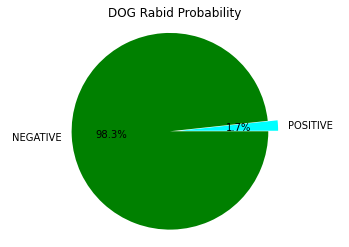

In [58]:
def prob_rabid(animal,df):
    labels = ['POSITIVE', 'NEGATIVE']
    colors = ['cyan', 'green']
    p = df.loc[(df['SpeciesIDDesc']==animal)&(df['ResultsIDDesc']=='POSITIVE')]
    n = df.loc[(df['SpeciesIDDesc'] == animal)&(df['ResultsIDDesc'] == 'NEGATIVE')]
    sizes = [len(p), len(n)]
    if len(p)==0:
        labels = ['', 'NEGATIVE']
    plt.pie(sizes,explode=[0.1,0],labels=labels,colors=colors,autopct ='%1.1f%%')
    plt.axis('equal')
    plt.title(animal + ' Rabid Probability')
    plt.show()
prob_rabid('DOG',df)

### In Conclusion: If you live in Louisville, of the animals that you may come in contact with, you are most likely to be bitten by a dog. Of the dog breeds, you are most likely to be bitten by a Pitbull, German Shepherd or Golden Retriever. If you are bitten by a dog, there is a 1.7% cha